In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [10]:
class LogisticRegression:
  def __init__(self, learning_rate = 0.01, num_iterations = 100):
    self.learning_rate = learning_rate
    self.num_iterations = num_iterations

  def fit(self, X,y):
    m, n = X.shape
    self.w = np.zeros(n)
    self.b = 0

    for i in range(self.num_iterations):
      z = np.dot(X, self.w) + self.b
      S = sigmoid(z)

      # compute gradients
      dw = (1/m) * np.dot(X.T, (S - y))
      db = (1/m) * np.sum(S - y)

      # update parameters
      self.w -= self.learning_rate * dw
      self.b -= self.learning_rate * db


      # print the cost for every 100 iterations
      if i % 100 == 0:
        cost = -(1/m) * np.sum(y * np.log(S) + (1 - y )* np.log(1 - S))
        print(f" iteration : {i}, Cost : {cost}")

  def predict_proba(self, X):
    z = np.dot(X, self.w) + self.b
    A = sigmoid(z)
    return A

  def predict(self, X):
    A = self.predict_proba(X)
    return A >= 0.5  # binary predictions

def accuracy(y_pred, y_true):
  return np.mean(y_true == y_pred)

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

In [4]:
# Sample data
X = np.array([[0.5, 1.5], [1.0, 1.0], [1.5, 0.5], [2.0, 1.0], [2.5, 1.5], [3.0, 2.0]])
y = np.array([0, 0, 0, 1, 1, 1])

In [5]:
model = LogisticRegression(learning_rate=0.1, num_iterations=1000)
model.fit(X, y)

 iteration : 0, Cost : 0.6931471805599452
 iteration : 100, Cost : 0.44757385845942954
 iteration : 200, Cost : 0.355901449277726
 iteration : 300, Cost : 0.30231051944458287
 iteration : 400, Cost : 0.26593065593229237
 iteration : 500, Cost : 0.23910712327000383
 iteration : 600, Cost : 0.21827823949387382
 iteration : 700, Cost : 0.20151151931507708
 iteration : 800, Cost : 0.18764771215001108
 iteration : 900, Cost : 0.17594150337653797


In [6]:
predictions = model.predict(X)
print("Predictions", predictions)

Predictions [False False False  True  True  True]


In [13]:
accu = accuracy(y, predictions)
print(f"Accuracy: {accu * 100:.2f}%")

Accuracy: 100.00%


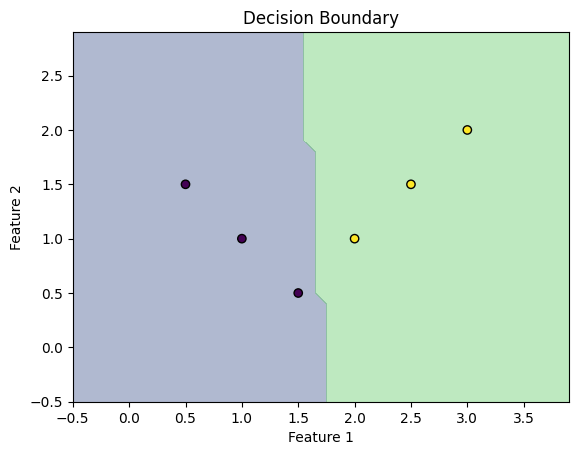

In [14]:
plot_decision_boundary(model, X, y)